# 1. Introduction

Connecticut contains 169 municipalities, 99 of which were established prior to the founding of Connecticut itself. While Connecticut is viewed as a wealthy state in aggregate, with the fifth-highest median household income among states, this aggregate view does not take into account the wide disparity of wealth, need, and socio-economic status at the municipal level. While the town of Weston has a median household income of \\$219,083 in 2018, the city of Hartford’s median household income is just a fraction of Weston’s at \\$34,338. These disparities in socioeconomic status must be considered when creating state policy that impacts municipalities.

In a hypothetical world, state legislators are interested in implementing a municipal aid policy that requires the creation of a new measure of town socioeconomic status. Towns will receive different levels of aid, accountability, and technical assistance from the State of Connecticut based on this measure. Please create a recommendation for a holistic measure of town socioeconomic status using the town-level dataset provided in the accompanying Excel file.

The recommendation should:

1. Be easily understood by non-technical stakeholders.
2. Provide each town with a total measure value based on the variables selected by the candidate.
3. Group towns with similar socioeconomic status.
4. Contain no more than 5 town-level variables.
5. Calculate town-level final outputs that are discrete, not continuous.
6. Only use data from the accompanying Excel file.

# 2. Import Data

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import geopandas as gpd
%matplotlib inline

## A. Import Main Data

In [2]:
# Import Skills Exercise data
connecticut = pd.read_excel('2021-03-29 Data for Skills Exercise.xlsx', header = 1)

In [3]:
connecticut

MUNICIPALITY  Town Number  Preliminary Live Birth Counts  \
0          ANDOVER            1                             21   
1          ANSONIA            2                            197   
2          ASHFORD            3                             41   
3             AVON            4                            138   
4      BARKHAMSTED            5                             23   
..             ...          ...                            ...   
164  WINDSOR LOCKS          165                            130   
165        WOLCOTT          166                            121   
166     WOODBRIDGE          167                             60   
167       WOODBURY          168                             57   
168      WOODSTOCK          169                             57   

     Preliminary Birth Rate  Estimated Population  \
0                       6.5                  3231   
1                      10.5                 18721   
2                       9.6                  4261   
3                       7.5                 18302   
4                       6.3                  3624   
..                      ...                   ...   
164                    10.1                 12876   
165                     7.3                 16649   
166                     6.8                  8805   
167                     6.0                  9537   
168                     7.3                  7862   

     Estimated Median Home Value  Labor Force  Unemployed  Unemployment Rate  \
0                         273300         1955          67           0.034271   
1                         211100         9293         526           0.056602   
2                         235400         2590         103           0.039768   
3                         385100         9506         285           0.029981   
4                         258500         2329          93           0.039931   
..                           ...          ...         ...                ...   
164                       191300         7507         327           0.043559   
165                       249600        10001         368           0.036796   
166                       471400         4859         149           0.030665   
167                       353500         5577         190           0.034068   
168                       256800         4190         171           0.040811   

     Median Household Income  TFA Participants  SNAP Recipients  \
0                     101098               4.5               45   
1                      53540             155.5             1298   
2                      68269              12.0              188   
3                     132500               9.0               74   
4                     111071               4.0               29   
..                       ...               ...              ...   
164                    66846              44.0              368   
165                    86786              14.0              289   
166                   142188               6.0               37   
167                    78025              11.0              161   
168                    89531               5.5               83   

     Poverty Status  Associate's Degree  Bachelor's Degree or higher  \
0                72                 202                          924   
1              2720                1233                         2605   
2               420                 323                         1056   
3               588                1056                         8724   
4                84                 276                         1122   
..              ...                 ...                          ...   
164             896                 866                         2180   
165             918                1113                         3315   
166             381                 361                         4224   
167             486                 549                         3392   
168             34

## B. Import GIS Data

In [4]:
# Import GIS shapefile
shapefile = 'CT_Vicinity_Town_Polygon.shp'

In [5]:
# Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)
gdf

geometry
0    POLYGON ((-73.34064 42.04837, -73.34062 42.048...
1    POLYGON ((-73.29629 42.04700, -73.28804 42.046...
2    POLYGON ((-73.17214 42.04340, -73.16961 42.043...
3    POLYGON ((-73.05308 42.03979, -73.05240 42.039...
4    POLYGON ((-72.97902 42.03826, -72.97767 42.038...
..                                                 ...
778  POLYGON ((-71.84238 41.40829, -71.84243 41.407...
779  POLYGON ((-71.89511 41.33081, -71.89586 41.329...
780  POLYGON ((-71.85097 41.32747, -71.85107 41.327...
781  POLYGON ((-71.91865 41.32658, -71.91866 41.326...
782  POLYGON ((-71.86448 41.32618, -71.86464 41.326...

[783 rows x 1 columns]

Notice that there are 783 rows of polygons. We need to do some initial cleaning before we can use the GIS data. We need to download spreadsheet that contains all the information about the GIS data from this [CT Deep GIS Open Data](https://ct-deep-gis-open-data-website-ctdeep.hub.arcgis.com/datasets/ct-vicinity-town-polygon/data?geometry=-77.285%2C40.844%2C-67.919%2C42.282&orderBy=OBJECTID&page=26&where=STATE_COD%20%3D%20%27CT%27%20AND%20LAND_CLASS%20%3D%20%27Land%27%20AND%20CNTY_FIELD%20%3D%20%27CNTY_COD%27%20AND%20%20(CNTY_NAME%20%3D%20%27New%20Haven%27%20OR%20CNTY_NAME%20%3D%20%27Fairfield%27%20OR%20CNTY_NAME%20%3D%20%27New%20London%27%20OR%20CNTY_NAME%20%3D%20%27Middlesex%27%20OR%20CNTY_NAME%20%3D%20%27Hartford%27%20OR%20CNTY_NAME%20%3D%20%27Litchfield%27%20OR%20CNTY_NAME%20%3D%20%27Windham%27%20OR%20CNTY_NAME%20%3D%20%27Tolland%27)%20).

In [6]:
# Import sreadsheet that contais all the information about the GIS data.
connecticut_boundary_set = pd.read_csv('Connecticut_and_Vicinity_Town_Boundary_Set.csv', header = 0)

In [7]:
# Concatenate the geopandas and the speradsheet we downloaded
CT_boundary = pd.concat([connecticut_boundary_set, gdf], axis=1)
# Notice that True/False in the LABEL_FLAG column. If True, we keep the data. If False, the infomrmation is
# useless so we drop the entire row.

In [8]:
CT_boundary_final = CT_boundary[CT_boundary['LABEL_FLAG'] == True].reset_index() #reset index
CT_boundary_final
# Now we only have 169 rows. In other words, GIS data on 169 towns.

index  OBJECTID LAND_CLASS    CT_LEGEND STATE_COD   STATE_NAME  \
0        0        23       Land  Connecticut        CT  Connecticut   
1        1        26       Land  Connecticut        CT  Connecticut   
2        2        27       Land  Connecticut        CT  Connecticut   
3        3        28       Land  Connecticut        CT  Connecticut   
4        4        29       Land  Connecticut        CT  Connecticut   
..     ...       ...        ...          ...       ...          ...   
164    508      1165       Land  Connecticut        CT  Connecticut   
165    534      1192       Land  Connecticut        CT  Connecticut   
166    562      1222       Land  Connecticut        CT  Connecticut   
167    596      1259       Land  Connecticut        CT  Connecticut   
168    778      1760       Land  Connecticut        CT  Connecticut   

    CNTY_FIELD  CNTY_COD   CNTY_NAME TOWN_FIELD     TOWN_NAME  LABEL_FLAG  \
0     CNTY_COD         3  Litchfield    TOWN_NO     Salisbury        True   
1     CNTY_COD         3  Litchfield    TOWN_NO  North Canaan        True   
2     CNTY_COD         3  Litchfield    TOWN_NO       Norfolk        True   
3     CNTY_COD         3  Litchfield    TOWN_NO     Colebrook        True   
4     CNTY_COD         2    Hartford    TOWN_NO      Hartland        True   
..         ...       ...         ...        ...           ...         ...   
164   CNTY_COD         1   Fairfield    TOWN_NO      Stamford        True   
165   CNTY_COD         1   Fairfield    TOWN_NO       Norwalk        True   
166   CNTY_COD         1   Fairfield    TOWN_NO     Greenwich        True   
167   CNTY_COD         1   Fairfield    TOWN_NO        Darien        True   
168   CNTY_COD         6  New London    TOWN_NO    Stonington        True   

        MAP_LABEL    CT_LABEL_Y CT_LABEL_N  SHAPE_Length  SHAPE_Area  \
0       Salisbury     Salisbury                 0.596666    0.016933   
1    North Canaan  North Canaan                 0.330442    0.005496   
2         Norfolk       Norfolk                 0.469949    0.013041   
3       Colebrook     Colebrook                 0.401726    0.009255   
4        Hartland      Hartland                 0.430597    0.009647   
..            ...           ...        ...           ...         ...   
164      Stamford      Stamford                 0.686881    0.010643   
165       Norwalk       Norwalk                 0.610698    0.006294   
166     Greenwich     Greenwich                 0.949661    0.013432   
167        Darien        Darien                 0.550134    0.003525   
168    Stonington    Stonington                 0.929157    0.010695   

                                              geometry  
0    POLYGON ((-73.34064 42.04837, -73.34062 42.048...  
1    POLYGON ((-73.29629 42.04700, -73.28804 42.046...  
2    POLYGON ((-73.17214 42.04340, -73.16961 42.043...  
3    POLYGON ((-73.05308 42.03979, -73.05240 42.039...  
4    POLYGON ((-72.97902 42.03826, -72.97767 42.038...  
..                                                 ...  
164  POLYGON ((-73.50244 41.11448, -73.50252 41.114...  
165  POLYGON ((-73.38689 41.17037, -73.38752 41.163...  
166  POLYGON ((-73.55560 41.02812, -73.55565 41.028...  
167  POLYGON ((-73.47440 41.11451, -73.47187 41.112...  
168  POLYGON ((-71.84238 41.40829, -71.84243 41.407...  

[169 rows x 18 columns]

# 3. Data Inspection

In [9]:
# Inspect column names -> better to remove white spaces in column names and change to lower case letters
connecticut.columns

Index(['MUNICIPALITY', 'Town Number', 'Preliminary Live Birth Counts',
       'Preliminary Birth Rate', 'Estimated Population',
       'Estimated Median Home Value', 'Labor Force', 'Unemployed',
       'Unemployment Rate', 'Median Household Income', 'TFA Participants',
       'SNAP Recipients', 'Poverty Status', 'Associate's Degree',
       'Bachelor's Degree or higher',
       'High School Diploma, GED, or equivalent',
       'Less than High School Diploma', 'Some College',
       'Percent without Health Insurance'],
      dtype='object')

In [10]:
# Inspect column types
connecticut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MUNICIPALITY                             169 non-null    object 
 1   Town Number                              169 non-null    int64  
 2   Preliminary Live Birth Counts            169 non-null    int64  
 3   Preliminary Birth Rate                   169 non-null    float64
 4   Estimated Population                     169 non-null    int64  
 5   Estimated Median Home Value              169 non-null    int64  
 6   Labor Force                              169 non-null    int64  
 7   Unemployed                               169 non-null    int64  
 8   Unemployment Rate                        169 non-null    float64
 9   Median Household Income                  169 non-null    int64  
 10  TFA Participants                         169 non-n

Data Dictionary:

**Birth Counts and Rates**: Preliminary Live Birth Counts from CT DPH. Birth Rates are the number of live births per 1000 residents in a given geography.

**Estimated Population**: Connecticut's official population estimates are published annually using the original vintage of the US Census Bureau's state and town estimates. For more information, visit https://portal.ct.gov/DPH/Health-Information-Systems--Reporting/Population/Population-Statistics

**Estimated Median Home Value**: Median Home Value by Town reports the median value of all owner occupied housing units.

**Labor force, unemployed, and unemployment rate**: Labor Force reports the size of the civilian noninstitutionalized labor force, by category.

**Median Household Income**: Labor Force reports the size of the civilian noninstitutionalized labor force, by category.

**TFA Participants**: Temporary Family Assistance reports the number of TFA cases

**SNAP Recipients**: Number of SNAP Recipients by Town

**Poverty Status**: Poverty Status by Town reports the number of people and children living in poverty.

**Educational Attainment**: Educational Attainment reports the level of education of individuals over the age of 25.

**Percent without Health Insurance**: Percent without Health Insurance

In [11]:
# Check if there are any missing values
connecticut.isnull().sum()

MUNICIPALITY                               0
Town Number                                0
Preliminary Live Birth Counts              0
Preliminary Birth Rate                     0
Estimated Population                       0
Estimated Median Home Value                0
Labor Force                                0
Unemployed                                 0
Unemployment Rate                          0
Median Household Income                    0
TFA Participants                           0
SNAP Recipients                            0
Poverty Status                             0
Associate's Degree                         0
Bachelor's Degree or higher                0
High School Diploma, GED, or equivalent    0
Less than High School Diploma              0
Some College                               0
Percent without Health Insurance           0
dtype: int64

Data looks clean; hence, no imputation needed.

# 4. Data Preprocessing / Data Cleaning

Let's clean our dataframes before we do any analysis or feature engineering

In [12]:
# Create a function to clean our main dataframe

def clean_dataframe(df):
    # Column names: remove white space and add underscore
    df.columns = df.columns.str.replace(' ', '_')
    
    # Column names: remove comma
    df.columns = df.columns.str.replace(',', '')
       
    # Column names: remove white spaces and convert to lower case
    df.columns = df.columns.str.strip().str.lower()
    
    # Capitalize the letter of the word in Municipality column
    df['municipality'] = df['municipality'].str.title()

In [13]:
clean_dataframe(connecticut)

In [14]:
connecticut

municipality  town_number  preliminary_live_birth_counts  \
0          Andover            1                             21   
1          Ansonia            2                            197   
2          Ashford            3                             41   
3             Avon            4                            138   
4      Barkhamsted            5                             23   
..             ...          ...                            ...   
164  Windsor Locks          165                            130   
165        Wolcott          166                            121   
166     Woodbridge          167                             60   
167       Woodbury          168                             57   
168      Woodstock          169                             57   

     preliminary_birth_rate  estimated_population  \
0                       6.5                  3231   
1                      10.5                 18721   
2                       9.6                  4261   
3                       7.5                 18302   
4                       6.3                  3624   
..                      ...                   ...   
164                    10.1                 12876   
165                     7.3                 16649   
166                     6.8                  8805   
167                     6.0                  9537   
168                     7.3                  7862   

     estimated_median_home_value  labor_force  unemployed  unemployment_rate  \
0                         273300         1955          67           0.034271   
1                         211100         9293         526           0.056602   
2                         235400         2590         103           0.039768   
3                         385100         9506         285           0.029981   
4                         258500         2329          93           0.039931   
..                           ...          ...         ...                ...   
164                       191300         7507         327           0.043559   
165                       249600        10001         368           0.036796   
166                       471400         4859         149           0.030665   
167                       353500         5577         190           0.034068   
168                       256800         4190         171           0.040811   

     median_household_income  tfa_participants  snap_recipients  \
0                     101098               4.5               45   
1                      53540             155.5             1298   
2                      68269              12.0              188   
3                     132500               9.0               74   
4                     111071               4.0               29   
..                       ...               ...              ...   
164                    66846              44.0              368   
165                    86786              14.0              289   
166                   142188               6.0               37   
167                    78025              11.0              161   
168                    89531               5.5               83   

     poverty_status  associate's_degree  bachelor's_degree_or_higher  \
0                72                 202                          924   
1              2720                1233                         2605   
2               420                 323                         1056   
3               588                1056                         8724   
4                84                 276                         1122   
..              ...                 ...                          ...   
164             896                 866                         2180   
165             918                1113                         3315   
166             381                 361                         4224   
167             486                 549                         3392   
168             34

In [15]:
# Create a function to clean our GIS dataframe

def clean_gis(df):
    
    # Drop all the unnecessary columns
    df = df.drop(['index', 'OBJECTID', 'LAND_CLASS','CT_LEGEND', 'STATE_COD', 'STATE_NAME',\
                 'CNTY_FIELD','CNTY_COD','TOWN_FIELD','LABEL_FLAG','MAP_LABEL','CT_LABEL_Y',\
                 'CT_LABEL_N','SHAPE_Length','SHAPE_Area'])    

In [16]:
clean_gis(CT_boundary_final)

KeyError: "['index' 'OBJECTID' 'LAND_CLASS' 'CT_LEGEND' 'STATE_COD' 'STATE_NAME'\n 'CNTY_FIELD' 'CNTY_COD' 'TOWN_FIELD' 'LABEL_FLAG' 'MAP_LABEL'\n 'CT_LABEL_Y' 'CT_LABEL_N' 'SHAPE_Length' 'SHAPE_Area'] not found in axis"

In [ ]:
CT_boundary_final

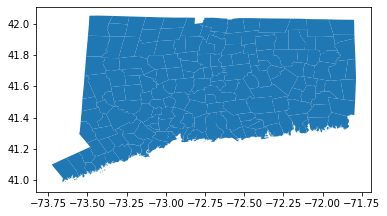

In [17]:
gdf.plot()

# 5. Feature Engineering

In [18]:
# Create a function that generates new features for the purpose of the analyis
def feature_engineering(df):
    """This function will create new variables for features engineering
    """
    
    # Calculate TFA Partcipants Rate which is caculated as Number of TFA participants / estimated population
    df['tfa_participants_rate'] = df['tfa_participants']/df['estimated_population']
    
    # Calculate SNAP Recipients Rate which is calculated as the number of SNAP recipients / estimated population
    df['snap_recipients_rate'] = df['snap_recipients']/df['estimated_population']
    
    # Calculate Poverty Rate which is calculated as the number of people living under poverty level / estimated population
    df['poverty_rate'] = df['poverty_status']/df['estimated_population']   
    
    # Calculate overall educaitonal attianment score:
    # Estimated population aged 25 years and above
    df['est_population_above_25'] = df["associate's_degree"] + df["bachelor's_degree_or_higher"] +\
    df["high_school_diploma_ged_or_equivalent"] + df["less_than_high_school_diploma"] + df["some_college"]
    
    # Percentage of the population aged 25 years and above that attained bachelor's degree or higher
    df['higher_edu_perc'] = df["bachelor's_degree_or_higher"] / df['est_population_above_25']
    

**Educational attainment of the population aged 25 years and above:**

Percentage distribution of population aged 25 years and above according to the highest level of education attained or completed.

**Formula:** $$\%P_{25+,h}^t= \frac{P_{25+,h}^t} {P_{25+}^t} \times 100   $$ 

where 


Percentage of the population aged 25 years and above that attained education level h in year t:

$$\%P_{25+,h}^t $$



Population aged 25 years and above that attained educational level h, in year t:

$$P_{25+,h}^t $$



Total population aged 25 years and above in year t:

$$P_{25+}^t $$



Since the data doesn't provide any information about the year, t, we can simply the formula by the following:

$$\%P_{25+,h}= \frac{P_{25+,h}} {P_{25+}} \times 100$$ 

Again, based on the formula above, we calculated the overall educational attainment score in our feature_engineering function

In [19]:
feature_engineering(connecticut)

In [20]:
connecticut

municipality  town_number  preliminary_live_birth_counts  \
0          Andover            1                             21   
1          Ansonia            2                            197   
2          Ashford            3                             41   
3             Avon            4                            138   
4      Barkhamsted            5                             23   
..             ...          ...                            ...   
164  Windsor Locks          165                            130   
165        Wolcott          166                            121   
166     Woodbridge          167                             60   
167       Woodbury          168                             57   
168      Woodstock          169                             57   

     preliminary_birth_rate  estimated_population  \
0                       6.5                  3231   
1                      10.5                 18721   
2                       9.6                  4261   
3                       7.5                 18302   
4                       6.3                  3624   
..                      ...                   ...   
164                    10.1                 12876   
165                     7.3                 16649   
166                     6.8                  8805   
167                     6.0                  9537   
168                     7.3                  7862   

     estimated_median_home_value  labor_force  unemployed  unemployment_rate  \
0                         273300         1955          67           0.034271   
1                         211100         9293         526           0.056602   
2                         235400         2590         103           0.039768   
3                         385100         9506         285           0.029981   
4                         258500         2329          93           0.039931   
..                           ...          ...         ...                ...   
164                       191300         7507         327           0.043559   
165                       249600        10001         368           0.036796   
166                       471400         4859         149           0.030665   
167                       353500         5577         190           0.034068   
168                       256800         4190         171           0.040811   

     median_household_income  ...  bachelor's_degree_or_higher  \
0                     101098  ...                          924   
1                      53540  ...                         2605   
2                      68269  ...                         1056   
3                     132500  ...                         8724   
4                     111071  ...                         1122   
..                       ...  ...                          ...   
164                    66846  ...                         2180   
165                    86786  ...                         3315   
166                   142188  ...                         4224   
167                    78025  ...                         3392   
168                    89531  ...                         2267   

     high_school_diploma_ged_or_equivalent  less_than_high_school_diploma  \
0                                      552                            107   
1                                     5166                           1583   
2                                      843                            232   
3                                     1301                            314   
4                                      656                            133   
..                                     ...                            ...   
164                                   3556                            748   
165                                   4155                            862   
166                                    783                            353   
167                                   1473          

# 6. Exploratory Data Analysis

Decide which variables are important for the purpose of the project:

- Preliminary birth rate
- Estimated population
- Estimated median home value
- Unemployment rate (unemployment rate = unemployed / labor force ) -> need to *100 in the future
- Median household income
- TFA participants
- SNAP recipients
- Poverty status
- Educational Attainment (or higher education percentage)
- Percent without health insurance

In [21]:
# Merge Geodataframe and main dataframe
CT = pd.merge(connecticut, CT_boundary_final, how = 'inner', left_on = 'municipality', right_on = 'TOWN_NAME')

In [22]:
# Import geopandas and folium
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm

In [23]:
# Convert the merged dataframe to a geodataframe
gdf = gpd.GeoDataFrame(CT , geometry = CT.geometry)
gdf.crs = {'init' :'epsg:4326'}

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [24]:
# Plot Map
mymap = folium.Map(location=[41.65637033118345, -72.67822945895269], zoom_start=8.6,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
myscale = (gdf['median_household_income'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
folium.Choropleth(
 geo_data=gdf,
 name='Choropleth',
 data=gdf,
 columns=['municipality','median_household_income'],
 key_on="feature.properties.municipality",
 fill_color='YlGnBu',
 threshold_scale=myscale,
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Median Household Income',
 smooth_factor=0
).add_to(mymap)


mymap

The map visualization simply shows the median household income based on cities.

Next, we would like to plot a correlation matix to see if any of our variables are highly correlated. If some of our variables are highly correlated, we can get get rid of some of the variables to decrease the dimension of the dataset for our K-means clustering algorithm without running principal component analysis.

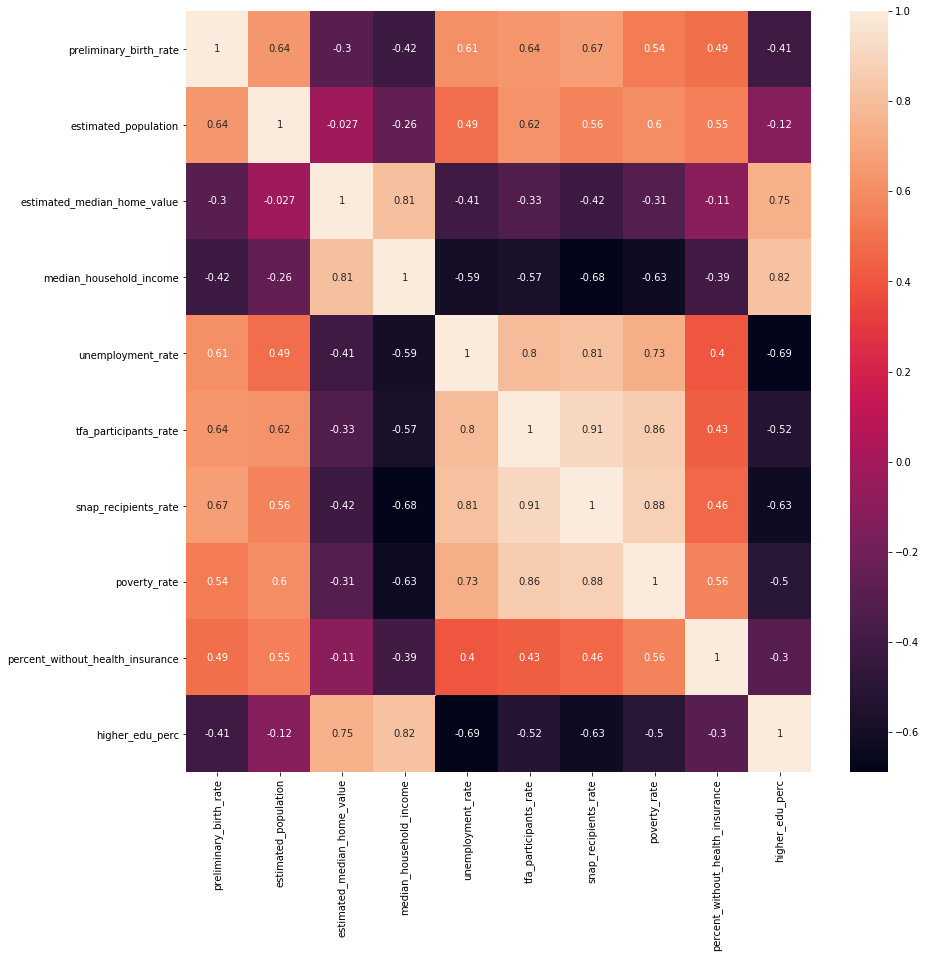

In [25]:
# Correlation Matrix
connecticut_matrix = pd.DataFrame(connecticut, columns = ['preliminary_birth_rate', 'estimated_population', 'estimated_median_home_value',\
                        'median_household_income', 'unemployment_rate', 'tfa_participants_rate', 'snap_recipients_rate',\
                        'poverty_rate', 'percent_without_health_insurance', 'higher_edu_perc'])
corrMatrix = connecticut_matrix.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Initial Observation:**

1. **TFA participants rate** and **SNAP recipients rate** are strongly correlated (r = 0.91)
2. **Poverty rate** is strongly correlated with **TFA participants rate** and **SNAP recipients rate** (r = 0.86, r = 0.88)
3. **Higher education percentage** is strongly correlated with estimated median home value and median household income. This reflects/reassures that educational attainment is closely related to the skills and competencies of a country's/city's population and could be seen as a proxy of both the quantiative and qualitative aspect of the stock of human capital.
4. **Estimated median home value** is strongly correlated with **median household income** (r = 0.81)
5. **Higher education percentage** is negatively correated with **unemployment rate** (r = -0.69)

<Figure size 1008x1008 with 0 Axes>

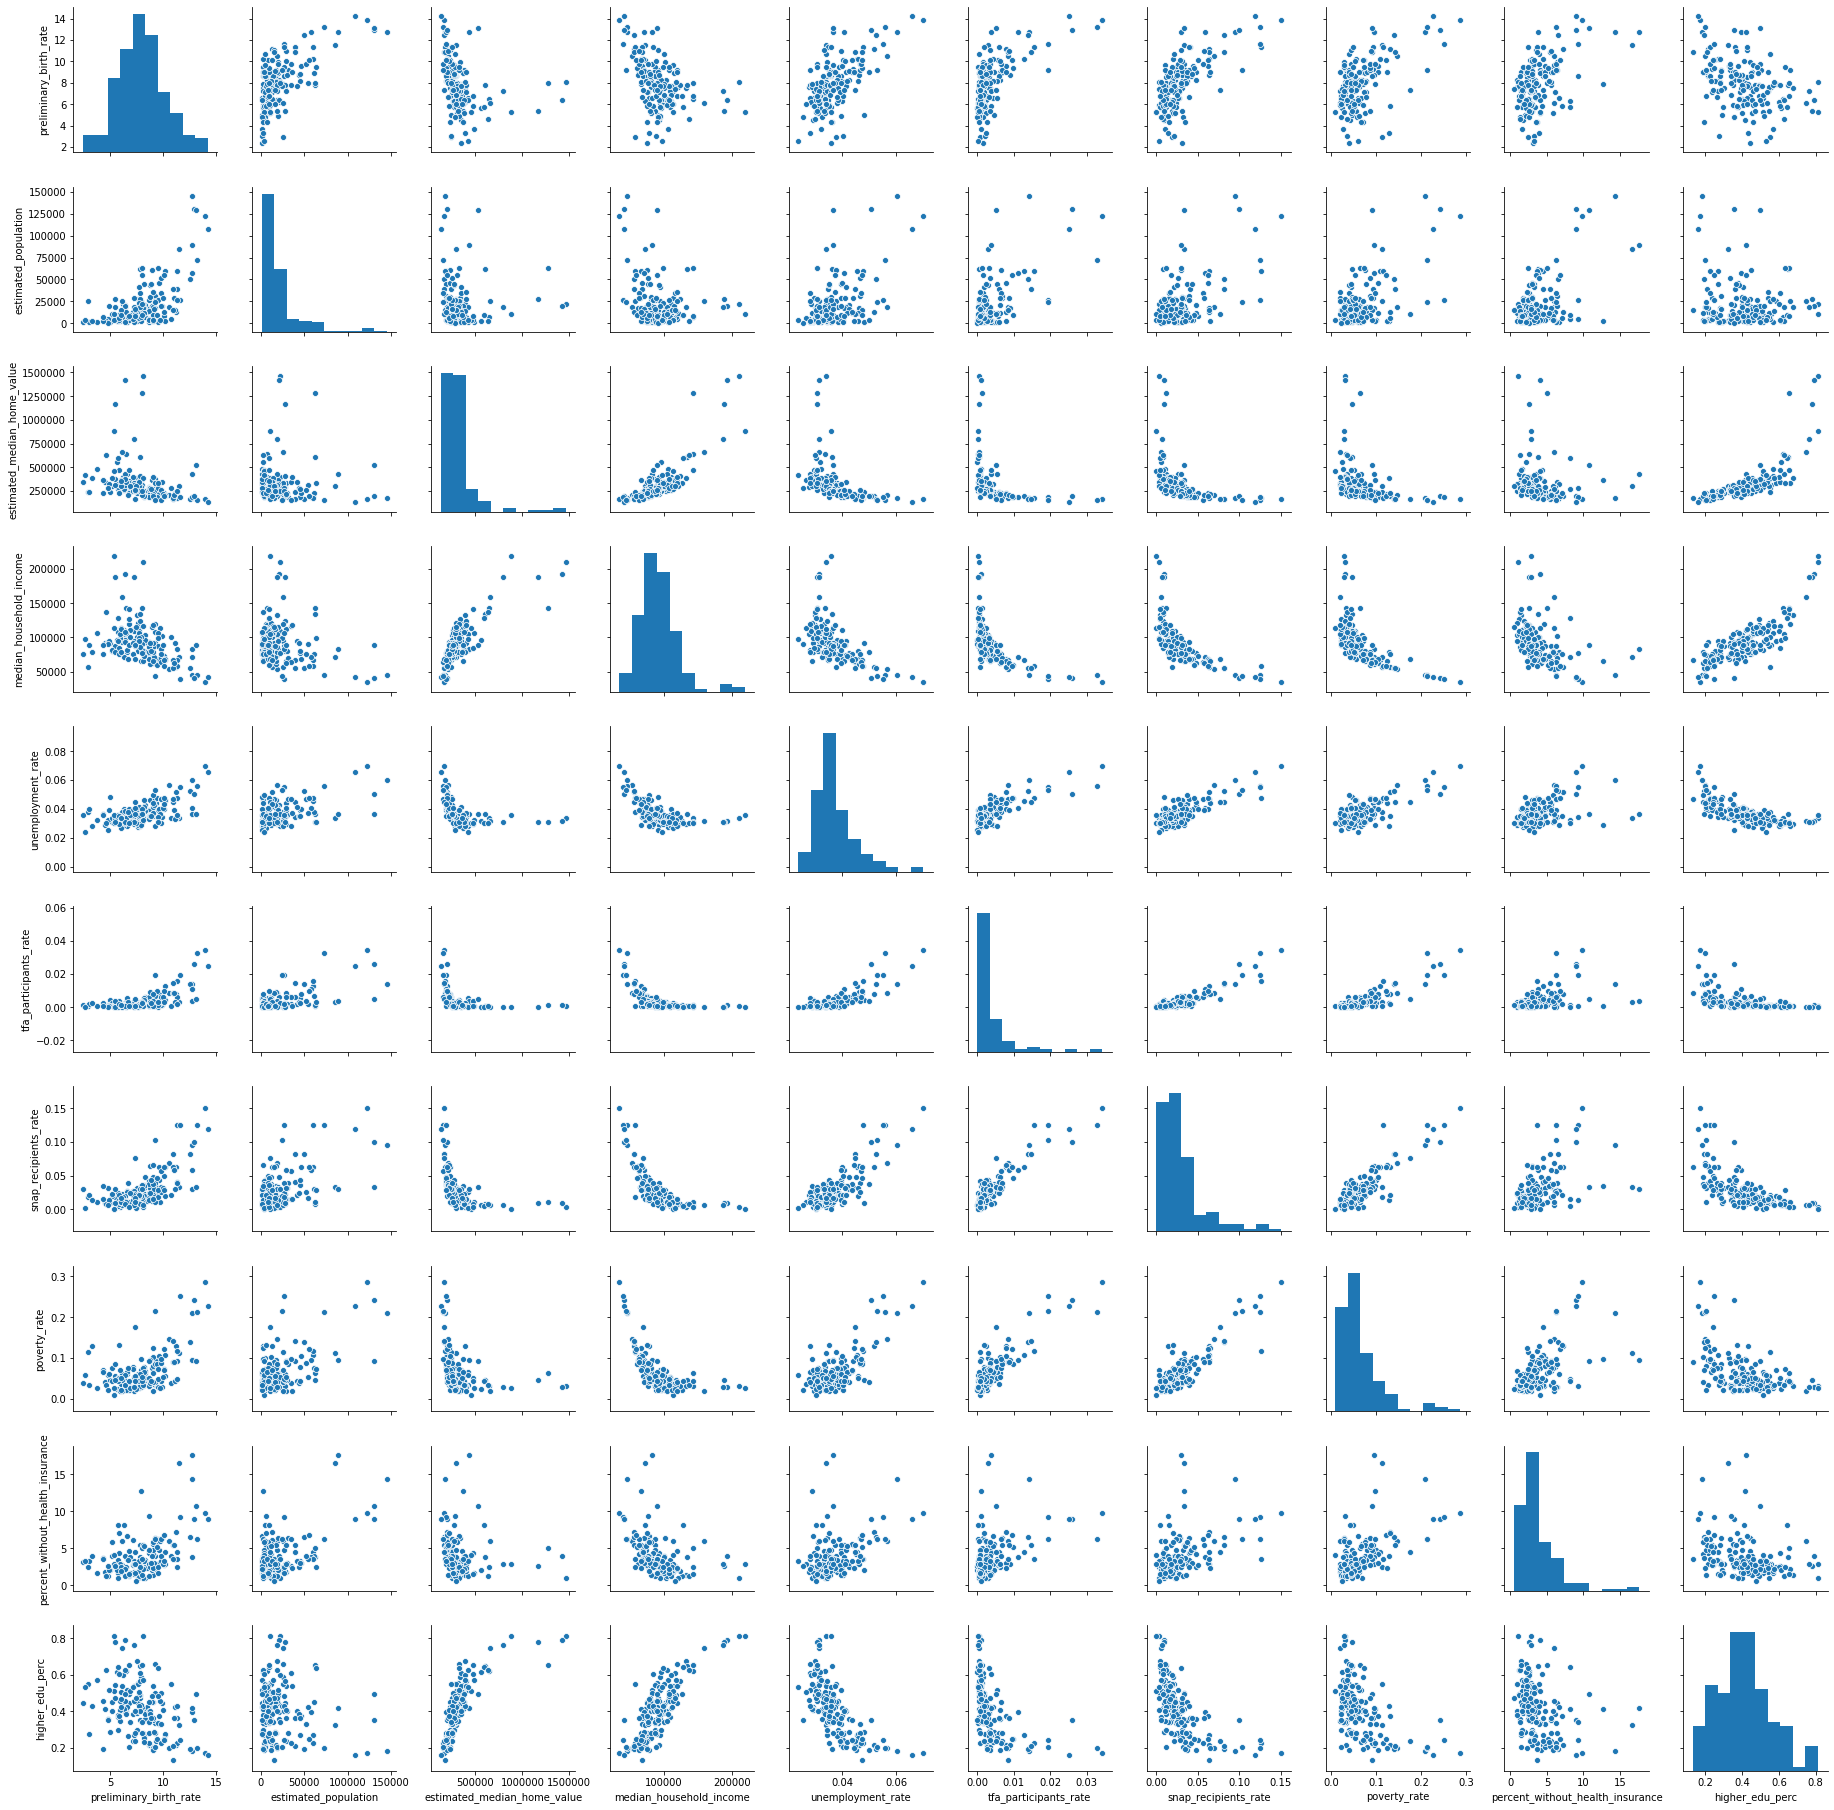

In [26]:
plt.figure(figsize = (14,14))
cols = ['preliminary_birth_rate', 'estimated_population', 'estimated_median_home_value',\
        'median_household_income', 'unemployment_rate', 'tfa_participants_rate', 'snap_recipients_rate',\
        'poverty_rate', 'percent_without_health_insurance','higher_edu_perc']
sns.pairplot(connecticut[cols], height = 2.5)
plt.show()

# 7. Unsupervised Learning using K-Means Cluster Analysis

## A. Why K-Means Clustering

Our purpose is to create a new measure of town socioeconomic status. Based on this holistic measure, towns will receive different levels of aid, accountability, and technical assistance from the State. Hence, we aim to group different towns together that are similar while separating observations that are dissimilar based on K-means clustering.

Advantage:
- Cluser analysis is largely exploratory in nature; perhaps the most suitable method to find pattern within the data
- Cluster analysis attempts to explore possible subpopulations that exist within the data.
- Good method to find approximately how many subgroups exists within the data?
- What commonalities exist among members in similar subgroups (futre questions to consider)

With the K-means clustering algorithm, my goal is to split up the observation into a predetermined number of clusters.

- The centroid of a cluster represents the average of the observations within a given cluster; it is a single theoretical cneter that represents the prototypical member that exists within the given cluster.
- Each observation will be assigned to exactly one of othe K clusters depending on where the observation falls in the feature space relative to the cluster centroid locations.

I will run only 1 K-Means clustering model: K-Means Clustering without reducing dimensionality by principal component analysis (PCA)

I will rather manually select the variables based on our initial correlation observation to reduce the dimensionality of our datset.

K-Means Clustering with dimensionality reduction by PCA will not be necessary since this is not a highly dimensional dataset.

## B. K-Means Clustering without Principal Component Analysis 

### I. Initial Observation

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
cols = ['preliminary_birth_rate', 'estimated_population', 'estimated_median_home_value',\
        'median_household_income', 'unemployment_rate', 'tfa_participants_rate', 'snap_recipients_rate',\
        'poverty_rate', 'percent_without_health_insurance','higher_edu_perc']

In [29]:
# Plotly graph for initial exploration before clustering
fig1 = px.scatter(connecticut, x="higher_edu_perc", y="median_household_income", color="unemployment_rate",
                 size="poverty_rate", labels = {
                     "higher_edu_perc": "Percentage of Higher Education",
                     "median_household_income": "Median Household Income",
                     "unemployment_rate": "Unemployment Rate",
                     "poverty_rate": "Poverty Rate"
                 })
fig1.update_layout(title="4 Features Representation")
fig1.show()

We can that the biggest circles are around the left-down zone. In other words, Poverty rates are high where Median household income is low and percentage of hihger education for age above 25 is low. In addition, Unemployment rates are high where Median household income is low and percentage of hihger education for age above 25 is low. We can see that there is a pattern here.

In [30]:
# 3D graph to see 5 features representation
fig2 = px.scatter_3d(connecticut, x="higher_edu_perc", y="median_household_income",z="estimated_median_home_value",
                     color="unemployment_rate",size="poverty_rate", labels = {
                     "higher_edu_perc": "Percentage of Higher Education",
                     "median_household_income": "Median Household Income",
                     "estimated_median_home_value" : "Estimated Median Home Value",   
                     "unemployment_rate": "Unemployment Rate",
                     "poverty_rate": "Poverty Rate"
                 })
fig2.update_layout(title="5 Features Representation")
fig2.show()

We can see a group in the down corner, but trying to make sense the 3-d plot plus the color and size information is a bit overwhelming. Hence, we would like to cluster these features.

In [31]:
connecticut

municipality  town_number  preliminary_live_birth_counts  \
0          Andover            1                             21   
1          Ansonia            2                            197   
2          Ashford            3                             41   
3             Avon            4                            138   
4      Barkhamsted            5                             23   
..             ...          ...                            ...   
164  Windsor Locks          165                            130   
165        Wolcott          166                            121   
166     Woodbridge          167                             60   
167       Woodbury          168                             57   
168      Woodstock          169                             57   

     preliminary_birth_rate  estimated_population  \
0                       6.5                  3231   
1                      10.5                 18721   
2                       9.6                  4261   
3                       7.5                 18302   
4                       6.3                  3624   
..                      ...                   ...   
164                    10.1                 12876   
165                     7.3                 16649   
166                     6.8                  8805   
167                     6.0                  9537   
168                     7.3                  7862   

     estimated_median_home_value  labor_force  unemployed  unemployment_rate  \
0                         273300         1955          67           0.034271   
1                         211100         9293         526           0.056602   
2                         235400         2590         103           0.039768   
3                         385100         9506         285           0.029981   
4                         258500         2329          93           0.039931   
..                           ...          ...         ...                ...   
164                       191300         7507         327           0.043559   
165                       249600        10001         368           0.036796   
166                       471400         4859         149           0.030665   
167                       353500         5577         190           0.034068   
168                       256800         4190         171           0.040811   

     median_household_income  ...  bachelor's_degree_or_higher  \
0                     101098  ...                          924   
1                      53540  ...                         2605   
2                      68269  ...                         1056   
3                     132500  ...                         8724   
4                     111071  ...                         1122   
..                       ...  ...                          ...   
164                    66846  ...                         2180   
165                    86786  ...                         3315   
166                   142188  ...                         4224   
167                    78025  ...                         3392   
168                    89531  ...                         2267   

     high_school_diploma_ged_or_equivalent  less_than_high_school_diploma  \
0                                      552                            107   
1                                     5166                           1583   
2                                      843                            232   
3                                     1301                            314   
4                                      656                            133   
..                                     ...                            ...   
164                                   3556                            748   
165                                   4155                            862   
166                                    783                            353   
167                                   1473          

### II. Finding Our Clusters - Elbow Method

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go




X = connecticut[['preliminary_birth_rate','estimated_median_home_value', 'median_household_income', 'unemployment_rate',\
                'poverty_rate', 'percent_without_health_insurance','higher_edu_perc']]


scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

K-Means is a distance-based algorithm. Because of that, it’s super important to normalize, standardize, or to choose any other option in which the distance has some comparable meaning for all the columns. 


Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of K, and choose the K for which WSS first starts to diminish. In the plot of WSS-versus K, this is visible as an elbow.


The steps can be summarized in the below steps:

1. Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

The optimal K value is found to be 3 using the elbow method.

In [33]:
connecticut_kmeans = pd.DataFrame(connecticut, columns = ["municipality",'preliminary_birth_rate', 'estimated_median_home_value',\
                        'median_household_income', 'unemployment_rate', 'poverty_rate', 'percent_without_health_insurance', 'higher_edu_perc'])

In [34]:
connecticut_kmeans

municipality  preliminary_birth_rate  estimated_median_home_value  \
0          Andover                     6.5                       273300   
1          Ansonia                    10.5                       211100   
2          Ashford                     9.6                       235400   
3             Avon                     7.5                       385100   
4      Barkhamsted                     6.3                       258500   
..             ...                     ...                          ...   
164  Windsor Locks                    10.1                       191300   
165        Wolcott                     7.3                       249600   
166     Woodbridge                     6.8                       471400   
167       Woodbury                     6.0                       353500   
168      Woodstock                     7.3                       256800   

     median_household_income  unemployment_rate  poverty_rate  \
0                     101098           0.034271      0.022284   
1                      53540           0.056602      0.145291   
2                      68269           0.039768      0.098568   
3                     132500           0.029981      0.032128   
4                     111071           0.039931      0.023179   
..                       ...                ...           ...   
164                    66846           0.043559      0.069587   
165                    86786           0.036796      0.055138   
166                   142188           0.030665      0.043271   
167                    78025           0.034068      0.050959   
168                    89531           0.040811      0.044136   

     percent_without_health_insurance  higher_edu_perc  
0                                 1.7         0.400000  
1                                 6.0         0.196886  
2                                 4.8         0.330931  
3                                 1.4         0.678383  
4                                 2.2         0.420540  
..                                ...              ...  
164                               3.2         0.240220  
165                               2.8         0.283237  
166                               1.5         0.656819  
167                               1.9         0.468832  
168                               1.6         0.402236  

[169 rows x 8 columns]

In [35]:
# Set up K-means clustering paramters
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
# Important to nomralize our variables
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=connecticut_kmeans.drop("municipality",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", 
                     line_close=True,labels = {
                     "higher_edu_perc": "Percentage of Higher Education",
                     "median_household_income": "Median Household Income",
                     "estimated_median_home_value" : "Estimated Median Home Value",   
                     "unemployment_rate": "Unemployment Rate",
                     "poverty_rate": "Poverty Rate",
                     "percent_without_health_insurance": "Percent W/O Heatlh Insurance"
                     }, height=800,width=800)
fig4.show()

In [36]:
# Set up K-means clustering paramters
kmeans.set_params(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [37]:
# get array of cluster centroids
kmeans.cluster_centers_

array([[0.40059551, 0.13256828, 0.32724464, 0.22636308, 0.13360576,
        0.14114114, 0.44436769],
       [0.67043315, 0.06250344, 0.15951838, 0.47357487, 0.3885534 ,
        0.33164392, 0.19440151],
       [0.35332464, 0.53747423, 0.69561454, 0.1773703 , 0.10173693,
        0.16374269, 0.84976828]])

In [38]:
# array of k-means clustering labels
kmeans.labels_

array([0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0], dtype=int32)

In [39]:
# newly created dataframe with labels
connecticut_kmeans

municipality  preliminary_birth_rate  estimated_median_home_value  \
0          Andover                     6.5                       273300   
1          Ansonia                    10.5                       211100   
2          Ashford                     9.6                       235400   
3             Avon                     7.5                       385100   
4      Barkhamsted                     6.3                       258500   
..             ...                     ...                          ...   
164  Windsor Locks                    10.1                       191300   
165        Wolcott                     7.3                       249600   
166     Woodbridge                     6.8                       471400   
167       Woodbury                     6.0                       353500   
168      Woodstock                     7.3                       256800   

     median_household_income  unemployment_rate  poverty_rate  \
0                     101098           0.034271      0.022284   
1                      53540           0.056602      0.145291   
2                      68269           0.039768      0.098568   
3                     132500           0.029981      0.032128   
4                     111071           0.039931      0.023179   
..                       ...                ...           ...   
164                    66846           0.043559      0.069587   
165                    86786           0.036796      0.055138   
166                   142188           0.030665      0.043271   
167                    78025           0.034068      0.050959   
168                    89531           0.040811      0.044136   

     percent_without_health_insurance  higher_edu_perc  
0                                 1.7         0.400000  
1                                 6.0         0.196886  
2                                 4.8         0.330931  
3                                 1.4         0.678383  
4                                 2.2         0.420540  
..                                ...              ...  
164                               3.2         0.240220  
165                               2.8         0.283237  
166                               1.5         0.656819  
167                               1.9         0.468832  
168                               1.6         0.402236  

[169 rows x 8 columns]

Visualize the result by the last two features.

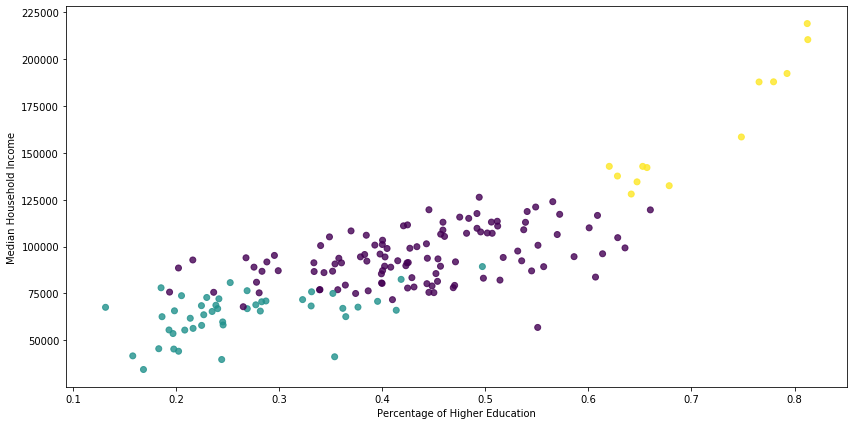

In [40]:
# plot a 2-d visualization the clustered model
plt.figure(figsize = (14,7))
plt.scatter(connecticut_kmeans['higher_edu_perc'], connecticut_kmeans['median_household_income'], c=kmeans.labels_, alpha=0.8)
plt.xlabel('Percentage of Higher Education')
plt.ylabel('Median Household Income')
plt.show()

In [41]:
# Pie chart 
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

I want to see the result where K=4

In [42]:
kmeans = KMeans(
        n_clusters=4, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=connecticut_kmeans.drop("municipality",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig5 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=800)
fig5.show()

In [43]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green','purple'])

**Decided to cluster the socioeconomic status based on K = 3**

In [44]:
# Define K-Means clustering 
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
# Normalize distribution
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=connecticut_kmeans.drop("municipality",axis=1).columns)
clusters['label']=kmeans.labels_

# Create a graph to visualize each variables weight in cluster analysis
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=800)
fig4.show()

In [45]:
clusters_final = clusters[['label']]

In [46]:
# Create a final dataframe
final_connecticut = pd.concat([connecticut, clusters_final], axis=1)
final_connecticut

municipality  town_number  preliminary_live_birth_counts  \
0          Andover            1                             21   
1          Ansonia            2                            197   
2          Ashford            3                             41   
3             Avon            4                            138   
4      Barkhamsted            5                             23   
..             ...          ...                            ...   
164  Windsor Locks          165                            130   
165        Wolcott          166                            121   
166     Woodbridge          167                             60   
167       Woodbury          168                             57   
168      Woodstock          169                             57   

     preliminary_birth_rate  estimated_population  \
0                       6.5                  3231   
1                      10.5                 18721   
2                       9.6                  4261   
3                       7.5                 18302   
4                       6.3                  3624   
..                      ...                   ...   
164                    10.1                 12876   
165                     7.3                 16649   
166                     6.8                  8805   
167                     6.0                  9537   
168                     7.3                  7862   

     estimated_median_home_value  labor_force  unemployed  unemployment_rate  \
0                         273300         1955          67           0.034271   
1                         211100         9293         526           0.056602   
2                         235400         2590         103           0.039768   
3                         385100         9506         285           0.029981   
4                         258500         2329          93           0.039931   
..                           ...          ...         ...                ...   
164                       191300         7507         327           0.043559   
165                       249600        10001         368           0.036796   
166                       471400         4859         149           0.030665   
167                       353500         5577         190           0.034068   
168                       256800         4190         171           0.040811   

     median_household_income  ...  high_school_diploma_ged_or_equivalent  \
0                     101098  ...                                    552   
1                      53540  ...                                   5166   
2                      68269  ...                                    843   
3                     132500  ...                                   1301   
4                     111071  ...                                    656   
..                       ...  ...                                    ...   
164                    66846  ...                                   3556   
165                    86786  ...                                   4155   
166                   142188  ...                                    783   
167                    78025  ...                                   1473   
168                    89531  ...                                   1182   

     less_than_high_school_diploma  some_college  \
0                              107           525   
1                             1583          2644   
2                              232           737   
3                              314          1465   
4                              133           481   
..                             ...           ...   
164                            748          1725   
165                            862          2259   
166                            353           710   
167                            317          1504   
168                            188          1371   

     percent_without_health_insurance  tfa_participants_rate  \
0            

### III. Interpretation

#### Socioeconomic Status Based on K-means Clustering

**Label 1: Low**

- Low percentage people at the age above 25 with a higher education degree
- High poverty rate
- High percentage without health insurance
- Low estimated median home value
- Low median household income
- High unemployment rate
- High preliminary birth rate

**Label 0: Middle**

- Medium percentage people at the age above 25 with a higher education degree
- Low poverty rate
- Low percentage without health insurance
- Low estimated median home value
- Medium median household income
- Low unemployment rate
- Low preliminary birth rate


**Label 2: High**

- High percentage people at the age above 25 with a higher education degree
- Low poverty rate
- Low percentage without health insurance
- High estimated median home value
- High median household income
- Low unemployment rate
- Low preliminary birth rate


# 8. Final Analysis

In [56]:
# Create a new column that characterizes each socioeconomic status based on the label we obtained from our model
final_connecticut['socioeconomic_status'] = final_connecticut['label'].apply(lambda x: "Middle" if x == 0 else \
                                                                            "Low" if x == 1 else "High")

In [57]:
final_connecticut

municipality  town_number  preliminary_live_birth_counts  \
0          Andover            1                             21   
1          Ansonia            2                            197   
2          Ashford            3                             41   
3             Avon            4                            138   
4      Barkhamsted            5                             23   
..             ...          ...                            ...   
164  Windsor Locks          165                            130   
165        Wolcott          166                            121   
166     Woodbridge          167                             60   
167       Woodbury          168                             57   
168      Woodstock          169                             57   

     preliminary_birth_rate  estimated_population  \
0                       6.5                  3231   
1                      10.5                 18721   
2                       9.6                  4261   
3                       7.5                 18302   
4                       6.3                  3624   
..                      ...                   ...   
164                    10.1                 12876   
165                     7.3                 16649   
166                     6.8                  8805   
167                     6.0                  9537   
168                     7.3                  7862   

     estimated_median_home_value  labor_force  unemployed  unemployment_rate  \
0                         273300         1955          67           0.034271   
1                         211100         9293         526           0.056602   
2                         235400         2590         103           0.039768   
3                         385100         9506         285           0.029981   
4                         258500         2329          93           0.039931   
..                           ...          ...         ...                ...   
164                       191300         7507         327           0.043559   
165                       249600        10001         368           0.036796   
166                       471400         4859         149           0.030665   
167                       353500         5577         190           0.034068   
168                       256800         4190         171           0.040811   

     median_household_income  ...  less_than_high_school_diploma  \
0                     101098  ...                            107   
1                      53540  ...                           1583   
2                      68269  ...                            232   
3                     132500  ...                            314   
4                     111071  ...                            133   
..                       ...  ...                            ...   
164                    66846  ...                            748   
165                    86786  ...                            862   
166                   142188  ...                            353   
167                    78025  ...                            317   
168                    89531  ...                            188   

     some_college  percent_without_health_insurance  tfa_participants_rate  \
0             525                               1.7               0.001393   
1            2644                               6.0               0.008306   
2             737                               4.8               0.002816   
3            1465                               1.4               0.000492   
4             481                               2.2               0.001104   
..            ...                               ...                    ...   
164          1725                               3.2               0.003417   
165          2259                               2.8               0.000841   
166           710                               1.5               0.000681   
167          1504 

Text(0, 0.5, 'Estimated Median Home Value')

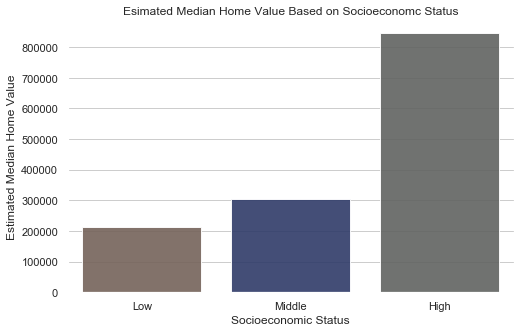

In [59]:
# Create a bar chart that shows estimated median home value based on socioeconomic status
sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF', 'grid.color': '#cdcdcd'})
colors = ["#7a6155","#263571","#60645f"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (8,5))

fig = sns.barplot(x = 'socioeconomic_status', y = 'estimated_median_home_value', data = final_connecticut,\
                 order = ['Low', 'Middle', 'High'], alpha = 0.9, ci = None)
fig.set_title('Esimated Median Home Value Based on Socioeconomc Status', fontsize=12)
fig.set_xlabel('Socioeconomic Status', fontsize=12)
fig.set_ylabel('Estimated Median Home Value', fontsize=12)

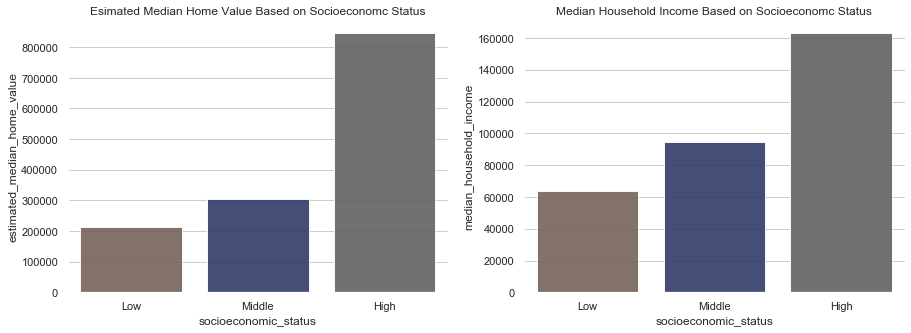

In [63]:
# Create 2 bar charts that show estimated median home value and median household income based on SES
plt.figure(figsize = (15,5))
plt.subplot(1,2,1).set_title('Esimated Median Home Value Based on Socioeconomc Status')
sns.barplot(x = 'socioeconomic_status', y = 'estimated_median_home_value', data = final_connecticut,\
                 order = ['Low', 'Middle', 'High'], alpha = 0.9, ci = None)

plt.subplot(1,2,2).set_title('Median Household Income Based on Socioeconomc Status')
sns.barplot(x = 'socioeconomic_status', y = 'median_household_income', data = final_connecticut,\
                 order = ['Low', 'Middle', 'High'], alpha = 0.9, ci = None)

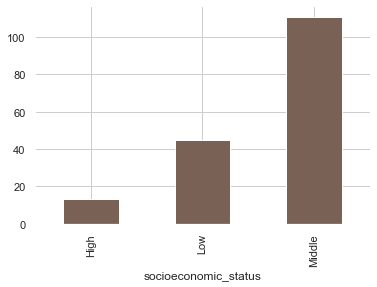

In [65]:
# Create a bart chart that counts the number of municipals in each SES
final_connecticut.groupby(['socioeconomic_status'])['municipality'].count().plot.bar()
# Many of the cities fall under the Middle SES. There are only 13 municipals that fall under High SES.

In [66]:
final_connecticut.groupby(['socioeconomic_status'])['municipality'].count()

socioeconomic_status
High       13
Low        45
Middle    111
Name: municipality, dtype: int64

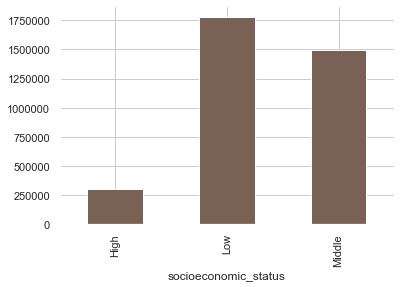

In [69]:
final_connecticut.groupby(['socioeconomic_status'])['estimated_population'].sum().plot.bar()
# Many of the population live in a low SES municpals. 

In [67]:
final_connecticut.groupby(['socioeconomic_status'])['estimated_population'].sum()

socioeconomic_status
High       294321
Low       1783191
Middle    1495153
Name: estimated_population, dtype: int64

# 9. Export Data

In [64]:
final_connecticut.to_csv('clustered_connecticut.csv')